In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def entropy(p):
    if np.isclose(p,0.0) or np.isclose(p,1.0):
        return 0.0
    else:
        return - p*np.log2(p) - (1-p)*np.log2((1-p))

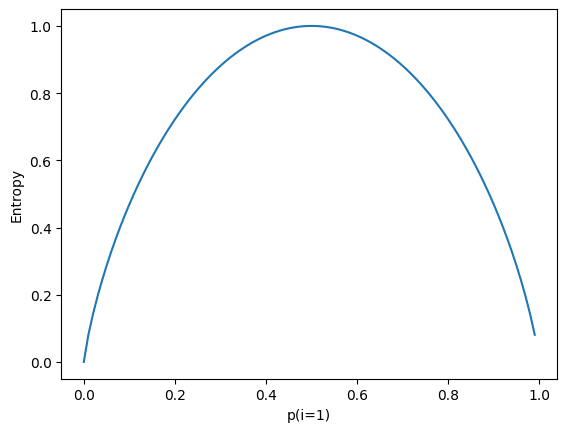

In [3]:
def plot_entropy():
    x = np.arange(0.0, 1, 0.01)
    ent = [entropy(p) for p in x]
    plt.plot(x, ent)
    plt.xlabel("p(i=1)")
    plt.ylabel("Entropy")
    plt.show()
    
plot_entropy()

In [4]:
def entropy_node(node):
    p = np.mean(node.target)
    return entropy(p)

In [5]:
def information_gain(node, feature):
    n_parent = node.size
    ent_parent = entropy_node(node)
    
    gain = ent_parent
    for value, child_node in node.groupby(feature):
        n_child = child_node.size
        ent_child = entropy_node(child_node)
        gain -= ent_child * (n_child/n_parent)
    return gain

In [6]:
def split(node, feature):
    splits = []
    for value, child_node in node.groupby(feature):
        splits.append(child_node)
    return splits

In [7]:
data = pd.DataFrame([
    ['blue', 'circle', 1], ['blue', 'circle', 1],['blue', 'circle', 1],
    ['red', 'circle', 0], ['red', 'circle', 0], ['red', 'circle', 1],        
    ['blue', 'square', 0], ['blue', 'square', 0], ['blue', 'square', 0],
    ['red', 'square', 1], ['red', 'square', 1], ['red', 'square', 0],
    ], columns=['color', 'shape', 'target'])

display(data.sort_values('color'))
print(f"entropy: {entropy_node(data)}")

,color,shape,target
0,blue,circle,1
1,blue,circle,1
2,blue,circle,1
6,blue,square,0
7,blue,square,0
8,blue,square,0
3,red,circle,0
4,red,circle,0
5,red,circle,1
9,red,square,1


entropy: 1.0


In [8]:
print(f"split on color: IG={information_gain(data, 'color')}")
print(f"split on shape: IG={information_gain(data, 'shape')}")

splits = split(data, 'shape')
for child_node in splits:
    display(child_node)
    print(f"entropy: {entropy_node(child_node)}")

split on color: IG=0.0
split on shape: IG=0.08170416594551044


,color,shape,target
0,blue,circle,1
1,blue,circle,1
2,blue,circle,1
3,red,circle,0
4,red,circle,0
5,red,circle,1


entropy: 0.9182958340544896


,color,shape,target
6,blue,square,0
7,blue,square,0
8,blue,square,0
9,red,square,1
10,red,square,1
11,red,square,0


entropy: 0.9182958340544896


In [9]:
circle = splits[0]
ig = information_gain(circle, 'color')
print(f"split circle on color: IG={ig}")
splits = split(circle, 'color')
for child_node in splits:
    display(child_node)
    print(f"entropy: {entropy_node(child_node)}")

split circle on color: IG=0.4591479170272448


,color,shape,target
0,blue,circle,1
1,blue,circle,1
2,blue,circle,1


entropy: 0.0


,color,shape,target
3,red,circle,0
4,red,circle,0
5,red,circle,1


entropy: 0.9182958340544896
